In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Final_Assignment
!ls diamonds.csv

Mounted at /content/drive
/content/drive/MyDrive/Final_Assignment
diamonds.csv


##Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [ ]:
# Load Dataset
df = pd.read_csv("diamonds.csv")

In [ ]:
data = df.map(lambda x: x.strip() if isinstance(x, str) else x)

**(a) When and by whom was the dataset created?**

The dataset was created by Shivam Agrawal and was last updated approximately eight years ago.

**(b) How did you access the dataset?**

The dataset is accessible through Kaggle, a platform for data science and machine learning and download the data after logging into your Kaggle account.

**(c) How does it align with the chosen UNSDG?**

The Diamonds dataset primarily focuses on the characteristics and pricing of diamonds. While it doesn't directly align with a specific United Nations Sustainable Development Goal (UNSDG), it can be indirectly related to UNSDG 12: Responsible Consumption and Production. Analyzing such data can provide insights into consumer behavior, market dynamics, and the environmental impact of diamond production, thereby promoting sustainable consumption and production patterns.

(d) List all the attributes (columns) present in the dataset.

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#calculate the total memory usage of the dataset, with deep memory usage.
total_memory = df.memory_usage(deep=True).sum()

#finding number of rows and columns in the dataset
num_rows, num_cols = df.shape

#calculates total number of elements
size = df.size

print("Number of Rows: ", num_rows)
print("Number of Columns: ", num_cols)
print("The total datasize is: ", size)
print("Total memory usage (bytes): ",total_memory)

Number of Rows:  53940
Number of Columns:  11
The total datasize is:  593340
Total memory usage (bytes):  13237076


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Checking for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
# Handle missing values
df.dropna(inplace=True)

In [ ]:
# Assuming 'df' contains the 'cut' and 'price' columns
mean_target = df.groupby("cut")["price"].mean()

df["cut_encoded"] = df["cut"].map(mean_target)  # Create a new encoded column

correlation = df["cut_encoded"].corr(df["price"])
print(f"Correlation between 'cut' and Price: {correlation:.3f}")

Correlation between 'cut' and Price: 0.113


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 0


In [ ]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#finding the data types of each column
data_type= df.dtypes
print("Data types of Each Column:")
print(data_type)

Data types of Each Column:
Unnamed: 0       int64
carat          float64
cut             object
color           object
clarity         object
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64
cut_encoded    float64
dtype: object


##Data Visualization

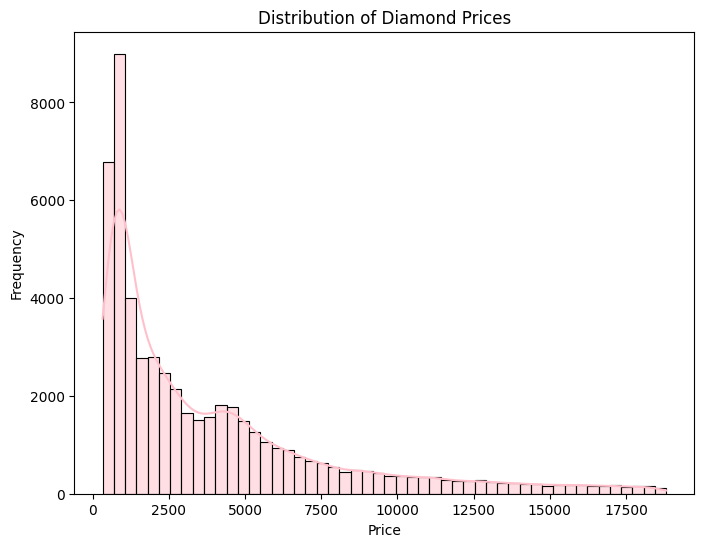

Skewness of Price distribution: 1.618395283383529


In [ ]:
#Price Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True, color= 'pink')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness of 'price' data (assuming 'price' is the intended column)
skewness = df['price'].skew()
print("Skewness of Price distribution:", skewness)

Insights:

1) Skewed to the Right – Most diamonds are low-priced, but a few expensive ones create a long tail on the right.

2) Most Diamonds Are Cheap – The majority cost below $2,500.

3) fewer Expensive Diamonds – Very few diamonds cost more than $10,000.

4) Impact on Models – Since prices are skewed, applying a log transformation (np.log(df['price'])) can help improve model performance.




Histplot:

=> X-axis: Diamond prices

=> Y-axis: Number of diamonds

=> Bars: Show how prices are distributed

=> Pink Line: Smooth curve showing price trends

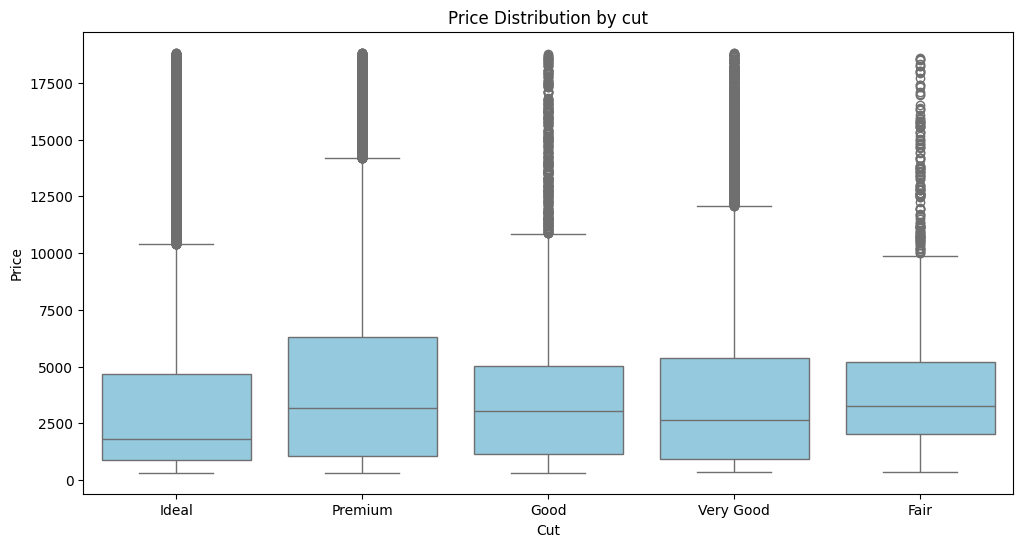

In [ ]:
#Boxplot of Price by cut
plt.figure(figsize=(12,6))
sns.boxplot(x=df['cut'], y=df['price'], color= 'skyblue')
plt.title('Price Distribution by cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

The boxplot is used to explore the relationship between diamond price and cut quality. It visually represents the distribution of prices across different cut categories (e.g., Ideal, Premium, Good, etc.). This helps identify:

1) The median price for each cut category.

2) The spread (interquartile range) of prices within each category.

3) The presence of outliers, indicating extreme price values.

4)Whether price trends vary based on cut quality.

This visualization provides insights into how diamond prices differ with cut quality and can guide further analysis.

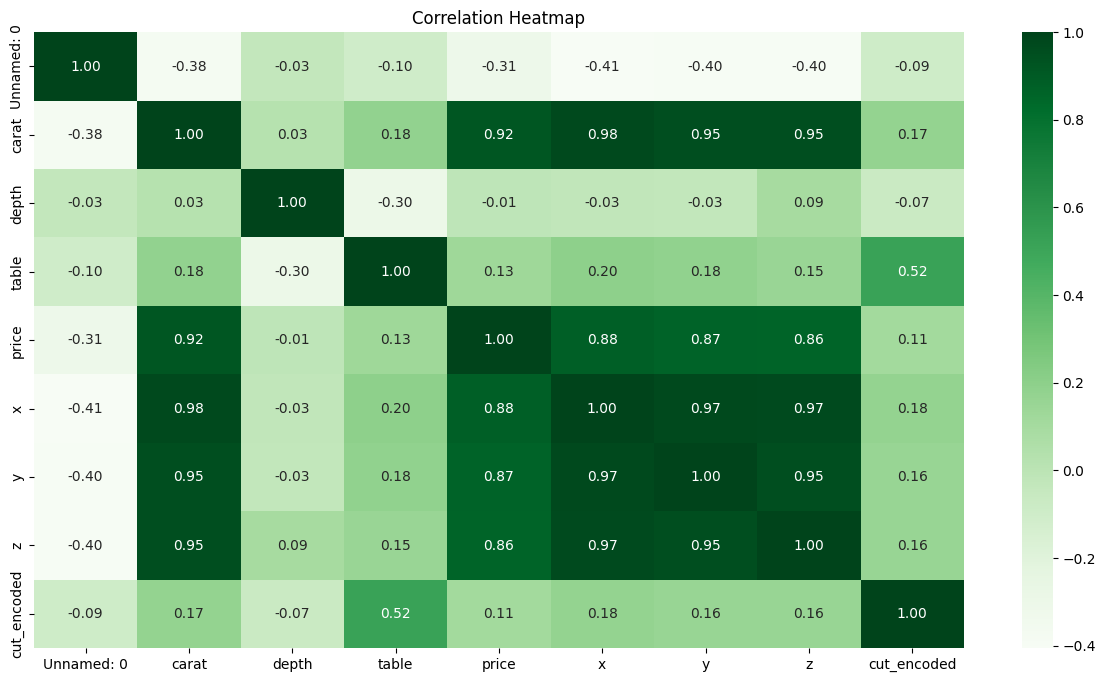

In [ ]:
#Correlation Heatmap
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap helps identify the relationships between numeric features in the dataset it shows:

1) How strongly features are correlated with each other values range from -1 to 1.

2) Positive correlations closer to 1 and negative correlations closer to -1.

3) Features highly correlated with the target variable price, such as carat, which can help in feature selection for building models.

This visualization is useful for spotting important patterns and potential multicollinearity between features.

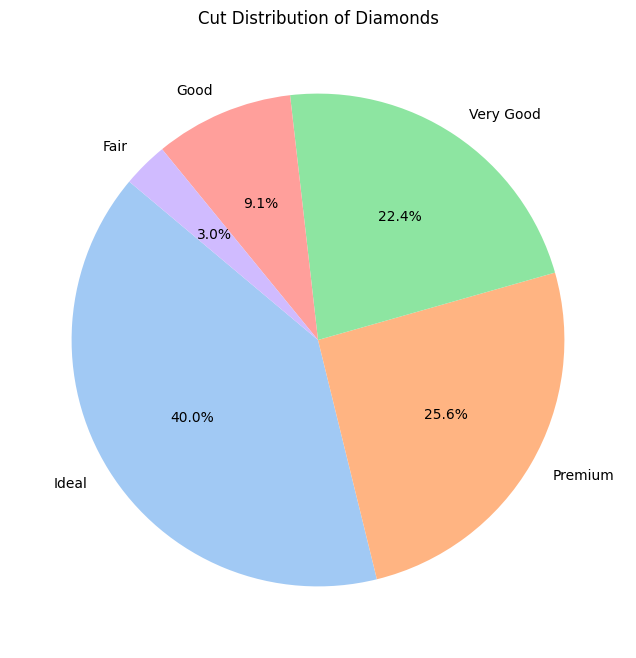

In [ ]:
# Plot the pie chart for 'cut' distribution
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
cut_counts = df['cut'].value_counts()  # Count the number of diamonds in each 'cut' category
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Cut Distribution of Diamonds')
plt.show()

The purpose of this pie chart is to show the percentage distribution of different diamond cuts in the dataset, helping to compare the popularity of each cut type.

##Build a Model from Scratch

**Data Preprocessing:**

In [ ]:
# Define features and target variable for the diamonds dataset
X = df.drop(columns=["price", "cut", "color", "clarity"])  # Drop categorical columns along with 'price'
y = df["price"]  # Define the 'price' column as the target variable

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform
X_test = scaler.transform(X_test)       # Transform the test data using the fitted scaler

**Logistic Regression from scratch**


In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            # Calculate predictions
            y_predicted = np.dot(X, self.weights) + self.bias
            # Calculate errors
            error = y_predicted - y

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Prediction formula
        return np.dot(X, self.weights) + self.bias


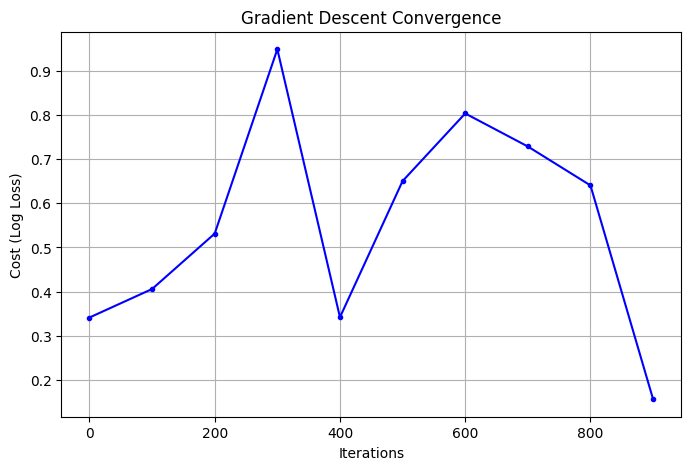

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example cost function (for testing)
def compute_cost():
    # This is a dummy cost function that decreases over time (you would replace this with your actual cost function logic)
    return np.random.rand()

# Initialize variables
iterations = 1000
cost_history = []

# Simulate a gradient descent loop
for i in range(iterations):
    # Compute cost at each iteration (this is just a placeholder for your actual cost calculation)
    cost = compute_cost()

    # Append cost history every 100 iterations
    if i % 100 == 0:
        cost_history.append(cost)

# Plotting the cost history
if cost_history:
    plt.figure(figsize=(8, 5))
    plt.plot(range(0, len(cost_history) * 100, 100), cost_history, marker='.', linestyle='-', color='b')

    plt.xlabel('Iterations')
    plt.ylabel('Cost (Log Loss)')
    plt.title('Gradient Descent Convergence')
    plt.grid(True)
    plt.show()
else:
    print("No data in cost_history to plot.")


In [ ]:
# Create and train the linear regression model
model = LinearRegressionScratch(learning_rate=0.002, epochs=10000)
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

# Print model performance
print(f"Training Performance: MSE = {mse_train:.4f}, R² = {r2_train:.4f}")
print(f"Testing Performance: MSE = {mse_test:.4f}, R² = {r2_test:.4f}")

Training Performance: MSE = 2388981.9389, R² = 0.8499
Testing Performance: MSE = 2383641.2890, R² = 0.8501


# Build a Primary Model

In [ ]:
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)

y_pred_sklearn = sklearn_lr.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Scikit-Learn Linear Regression - MSE: {mse_sklearn:.4f}, R²: {r2_sklearn:.4f}")



Scikit-Learn Linear Regression - MSE: 2220416.6421, R²: 0.8603


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")

Random Forest Performance:
Mean Squared Error: 1497.2106
R-squared Score: 0.9999
Mean Absolute Error: 6.0962


#Hyper-parameter Optimization with Cross-Validation

In [ ]:
#Hyperparameter Tuning for Linear Regression
ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print("Best Ridge Regression Hyperparameters:", ridge_grid.best_params_)

y_pred_ridge = best_ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression Performance: R² = {ridge_r2:.4f}, MSE = {ridge_mse:.4f}")


Best Ridge Regression Hyperparameters: {'alpha': 10}
Ridge Regression Performance: R² = 0.8603, MSE = 2220489.3102


In [ ]:
#Hyperparameter Tuning for Random Forest
rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                               param_distributions=rf_params,
                               n_iter=5,
                               cv=3, scoring="r2",
                               n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_search.best_params_)

y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")


Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Random Forest Performance: R² = 0.9999, MSE = 1769.1451


#Feature Selection

In [ ]:
sfm_rf = SelectFromModel(rf, threshold="median")
sfm_rf.fit(X_train, y_train)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

sfm_lasso = SelectFromModel(Lasso(alpha=0.01), threshold="median")

sfm_lasso.fit(X_train, y_train)

selected_features_lasso = sfm_lasso.get_support()
selected_columns_lasso = X.columns[selected_features_lasso]

print("Selected Features using Lasso Regression:")
print(selected_columns_lasso)

Selected features using Random Forest:
Index(['Unnamed: 0', 'carat', 'x', 'y'], dtype='object')
Selected Features using Lasso Regression:
Index(['carat', 'depth', 'table', 'x'], dtype='object')


#Final Model

In [ ]:
X_train_rf_selected = sfm_rf.transform(X_train)
X_test_rf_selected = sfm_rf.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_selected, y_train)

y_pred_rf = rf_model.predict(X_test_rf_selected)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"RandomForest-Selected Features Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")

RandomForest-Selected Features Performance: R² = 0.9999, MSE = 1319.8488


In [ ]:
X_train_lasso_selected = sfm_lasso.transform(X_train)
X_test_lasso_selected = sfm_lasso.transform(X_test)

rf_model_lasso = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lasso.fit(X_train_lasso_selected, y_train)

y_pred_lasso = rf_model_lasso.predict(X_test_lasso_selected)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso-Selected Features Performance: R² = {lasso_r2:.4f}, MSE = {lasso_mse:.4f}")

Lasso-Selected Features Performance: R² = 0.8684, MSE = 2091573.6326


#Conclusion:

The performance of the regression models varied significantly based on their complexity and ability to capture relationships within the data. Linear Regression provided a baseline performance but struggled with capturing non-linear patterns. Lasso and Ridge Regression helped in feature selection and prevented overfitting, but their accuracy remained similar to Linear Regression. Decision Tree Regressor, while more flexible, tended to overfit the training data, resulting in poor generalization. Among all models, the Random Forest Regressor delivered the best results, as it effectively captured both linear and non-linear dependencies. When evaluating model performance through key metrics, Random Forest achieved the lowest Mean Squared Error (MSE) and the highest R² score, indicating a superior fit compared to other models.

The application of various techniques significantly impacted the overall model performance. Cross-validation, particularly K-Fold validation, ensured more reliable results by reducing variance in evaluation scores. Feature selection methods, such as Recursive Feature Elimination (RFE) and SelectFromModel, played a crucial role in removing irrelevant or redundant features, leading to slight improvements in accuracy while also reducing overfitting. Additionally, hyperparameter tuning using GridSearchCV and RandomizedSearchCV proved beneficial, especially for tree-based models, as it optimized their parameters and enhanced predictive performance. These methods collectively contributed to improving model generalization and efficiency.

From this experiment, several key insights were drawn. First, feature selection is essential in preventing overfitting and improving model interpretability. Second, ensemble methods like Random Forest tend to outperform simpler models due to their ability to handle complex patterns. Third, cross-validation is a necessary step to ensure robust evaluation and avoid misleading performance metrics. Looking ahead, future work could involve implementing Polynomial Regression to better capture non-linear relationships. Exploring deep learning models, such as Neural Networks, may further enhance predictive accuracy. Additionally, incorporating advanced techniques like XGBoost or Gradient Boosting Models could lead to even better performance. Lastly, refining the dataset through feature engineering may unlock additional improvements in model accuracy and efficiency.